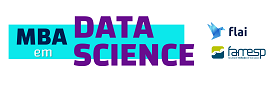

# **Preços das Criptomoedas**

## **Entendendo o contexto**

### **Criptomoedas**

De forma bem popular podemos pensar que as criptomoedas é um tipo de dinheiro, que circula por meio digitial, e que pode ser comprada e vendida, ou pode ser utilizada para realizar compras pela internet (e até mesmo em algumas lojas físicas que já passaram a receber pagamentos em criptmoedas).

A mais famosa é a Bitcoin, que foi anunciada por Satoshi Nakamoto (este é um pseudônimos, até hoje, nunca foi revelado o verdadeiro nome de Satoshi) em 2009, e, mesmo depois de mais de uma década, continua sendo transacionada sem interrupção. Já a Ethereum, mesmo sendo criada em 2013, só foi lançada em 2015, e foi financiado por um sistema de "vaquinhas" on-line e tem um fundador conhecido.

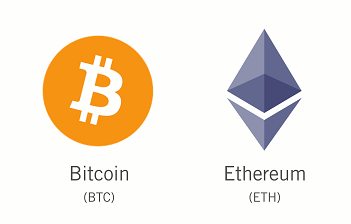

### **O Objetivo da Aula**

Entender o comportamento dos preços de Criptomoedas através de visualização de dados.

### **O dataset**

Este conjunto de dados foi estruturado de forma que cada instância é um dia de determinado ano, e os atributos são indicadores de preços de Criptmoedas:

- **Criptomoeda:** Qual Criptomoeda;

- **Iniciais:** Sigla da Criptomoeda;

- **Data:** Dia do ano;

- **Abertura:** Preço da ação no momento da abertura da bolsa no dia;

- **Alta:** Maior valor negociado no dia;

- **Baixa:** Menos valor negociado no dia;

- **Fechamento:** Preço da ação no momento de fechamento da bolsa no dia;

- **Fechamento_ajustado:** Preço de fechamento após ajustes;

- **Volume:** Volume de ações negociados no dia;

O conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

- https://raw.githubusercontent.com/jonates/opendata/master/criptomoedas/criptomoedas.csv

No Site do Yahoo é possível consultar séries históricas de diversas ações. Confira no link:
- https://finance.yahoo.com/quote/ETH-USD/history?period1=1438905600&period2=1651104000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

- https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1651104000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


### **A Biblioteca Plotly**

Plotly é uma biblioteca que fornece diversos gráficos dinâmicos e interativos.

Para maiores informações do Plotly, consulte a documentação no endereço a seguir:

- https://plotly.com/

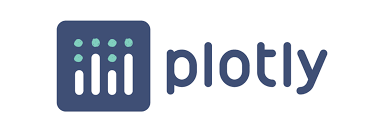

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [1]:
# Fazendo download do conjunto de dados
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/criptomoedas/criptomoedas.csv

--2022-04-29 12:01:32--  https://raw.githubusercontent.com/jonates/opendata/master/criptomoedas/criptomoedas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450435 (440K) [text/plain]
Saving to: ‘criptomoedas.csv’

criptomoedas.csv    100%[===================>] 439.88K  --.-KB/s    in 0.03s   

2022-04-29 12:01:33 (12.5 MB/s) - ‘criptomoedas.csv’ saved [450435/450435]



In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o conjunto de dados com preços das criptomoedas
criptomoedas = pd.read_csv(
    filepath_or_buffer = '/content/criptomoedas.csv', 
    sep=';',
    decimal='.'
)

In [4]:
# Espiando o conjunto de dados
criptomoedas

,Criptomoeda,Iniciais,Data,Abertura,Fechamento,Alta,Baixa,Fechamento_ajustado,Volume
0,Bitcoin USD,BTC-USD,17/09/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,Bitcoin USD,BTC-USD,18/09/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,Bitcoin USD,BTC-USD,19/09/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,Bitcoin USD,BTC-USD,20/09/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,Bitcoin USD,BTC-USD,21/09/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...
4408,Ethereum USD,ETH-USD,24/04/2022,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
4409,Ethereum USD,ETH-USD,25/04/2022,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614
4410,Ethereum USD,ETH-USD,26/04/2022,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
4411,Ethereum USD,ETH-USD,27/04/2022,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041


### **Espiando a estrutura dos dados**

In [5]:
# Informacoes gerais do conjunto de dados
criptomoedas.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Criptomoeda          4413 non-null   object 
 1   Iniciais             4413 non-null   object 
 2   Data                 4413 non-null   object 
 3   Abertura             4413 non-null   float64
 4   Fechamento           4413 non-null   float64
 5   Alta                 4413 non-null   float64
 6   Baixa                4413 non-null   float64
 7   Fechamento_ajustado  4413 non-null   float64
 8   Volume               4413 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 310.4+ KB


In [6]:
# Verificando valores missing
criptomoedas.isnull().sum()

Criptomoeda            0
Iniciais               0
Data                   0
Abertura               0
Fechamento             0
Alta                   0
Baixa                  0
Fechamento_ajustado    0
Volume                 0
dtype: int64

### **Transformações no Conjunto de dados**

In [7]:
# Transformação Data em formato de data
criptomoedas['Data'] = pd.to_datetime(criptomoedas.Data, infer_datetime_format=True) 

In [8]:
# Informacoes gerais do conjunto de dados
criptomoedas.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Criptomoeda          4413 non-null   object        
 1   Iniciais             4413 non-null   object        
 2   Data                 4413 non-null   datetime64[ns]
 3   Abertura             4413 non-null   float64       
 4   Fechamento           4413 non-null   float64       
 5   Alta                 4413 non-null   float64       
 6   Baixa                4413 non-null   float64       
 7   Fechamento_ajustado  4413 non-null   float64       
 8   Volume               4413 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 310.4+ KB


In [9]:
# Espiando o conjunto de dados
criptomoedas

,Criptomoeda,Iniciais,Data,Abertura,Fechamento,Alta,Baixa,Fechamento_ajustado,Volume
0,Bitcoin USD,BTC-USD,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,Bitcoin USD,BTC-USD,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,Bitcoin USD,BTC-USD,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,Bitcoin USD,BTC-USD,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,Bitcoin USD,BTC-USD,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...
4408,Ethereum USD,ETH-USD,2022-04-24,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
4409,Ethereum USD,ETH-USD,2022-04-25,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614
4410,Ethereum USD,ETH-USD,2022-04-26,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
4411,Ethereum USD,ETH-USD,2022-04-27,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041


### **Gráfico dos preços**

In [10]:
# Importando as bibliotecas necessarias
import plotly.express as px

#### **Preços de Bitcoin**

In [11]:
# Pegando somente a série do Bitcoin
bitcoin = criptomoedas.query('Iniciais=="BTC-USD"')

In [12]:
# Gerando o gráfico de linhas com os maior preços de Bitcoin por dia
px.line(data_frame = bitcoin, x='Data', y="Alta")


In [14]:
# Incrementando o gráfico de linhas com os maior preços de Bitcoin por dia
px.line(
    data_frame = bitcoin, 
    x='Data', 
    y="Alta",
    title = '<b>Maior preço de Bitcoin por dia.</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Alta': 'Maior valor do dia (em Dolar)'
    },
   markers=True,
   template = 'ggplot2'
)

In [15]:
# Mudando a cor da linha no contexto que tem somente uma série
px.line(
    data_frame = bitcoin, 
    x='Data', 
    y="Alta",
    title = '<b>Maior preço de Bitcoin por dia.</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Alta': 'Maior valor do dia (em Dolar)'
    },
    color = 'Iniciais',
    color_discrete_map = { 
      'BTC-USD' :'yellow'
    },
    template = 'plotly_dark'
)

#### **Comparando Bitcoin e Ethereum**

In [16]:
# Preços mínimos de Criptomoedas
px.line(
    data_frame = criptomoedas, 
    x='Data', 
    y="Baixa",
    color='Iniciais',
    template = 'plotly_white'
)

In [17]:
# Incrementando o gráfico de comparação entre BTC e ETH
px.line(
    data_frame = criptomoedas, 
    x='Data', 
    y="Baixa",
    color='Iniciais',
    color_discrete_map = { 
      'BTC-USD' : 'green',
      'ETH-USD' : 'orange'
    },
    title = '<b>Preços mínimo por dia de Criptomoedas.</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Baixa': 'Menor valor do dia (em Dolar)'
    },
    markers=True,
    symbol="Iniciais",
    template = 'presentation'
)

In [19]:
# Utilizando escala logarítmica para comparar os comportamentos
px.line(
    data_frame = criptomoedas, 
    x='Data', 
    y="Baixa",
    color='Iniciais',
    color_discrete_map = { 
      'BTC-USD' : 'darkblue',
      'ETH-USD' : 'darkorange'
    },
    title = '<b>Preços mínimo por dia de Criptomoedas.</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Baixa': 'Menor valor do dia (em Dolar)'
    },
    template = 'simple_white',
    log_y = True
)

Para mais detalhes destes gráficos consulte a documentação oficial do Plotly através dos links:
- https://plotly.com/python/line-charts/
- https://plotly.com/python-api-reference/generated/plotly.express.line
- https://plotly.com/python/styling-plotly-express/
- https://plotly.com/python/templates/

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa um gráfico com a biblioteca plotly utilizando o método line, para visualizar informações dos preços de ações da Petróleo Brasileiro S.A. - Petrobras (PETR4.SA).

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/mercado_acoes/PETR4.csv